Nombre total d'aéroports : 1458
Nombre total de vols : 252704
Nombre total de destinations : 103
Nombre d'aéroports qui ne passent pas à l'heure d'été : 23
Nombre total de fuseaux horaires uniques : 10
Fuseaux horaires uniques : ['America/New_York' 'America/Chicago' 'America/Los_Angeles'
 'America/Vancouver' 'America/Phoenix' 'America/Anchorage'
 'America/Denver' 'Pacific/Honolulu' 'Asia/Chongqing' '\\N']
Nombre total de compagnies aériennes : 16
Liste des compagnies aériennes :
   carrier                         name
0       9E            Endeavor Air Inc.
1       AA       American Airlines Inc.
2       AS         Alaska Airlines Inc.
3       B6              JetBlue Airways
4       DL         Delta Air Lines Inc.
5       EV     ExpressJet Airlines Inc.
6       F9       Frontier Airlines Inc.
7       FL  AirTran Airways Corporation
8       HA       Hawaiian Airlines Inc.
9       MQ                    Envoy Air
10      OO        SkyWest Airlines Inc.
11      UA        United Air Lines I

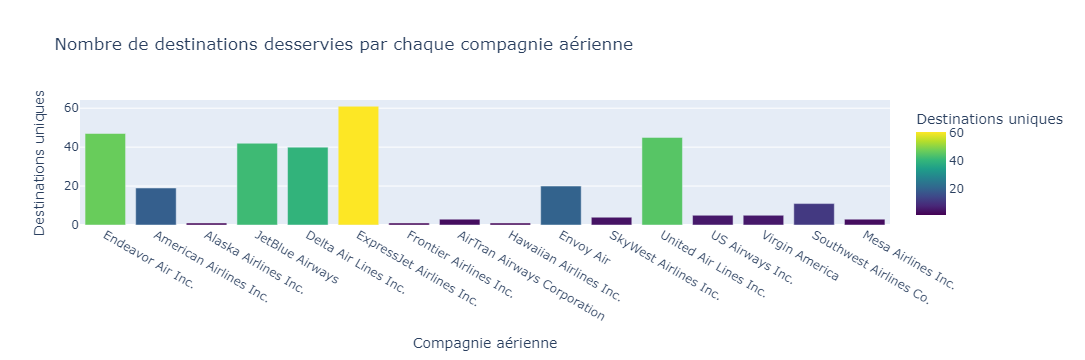

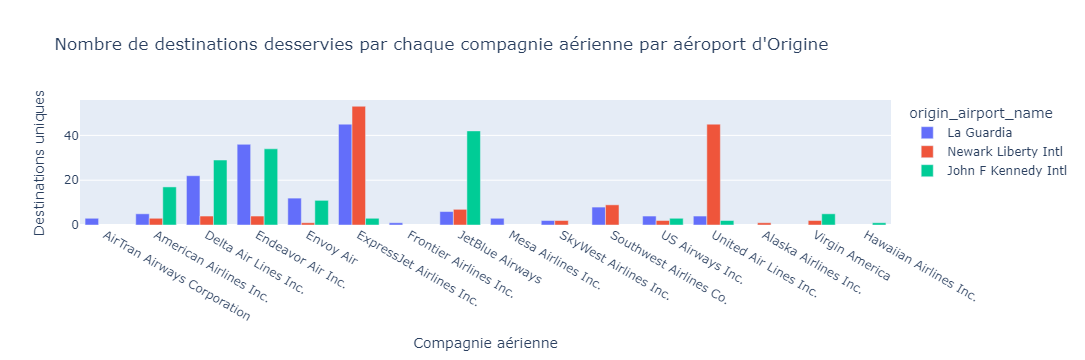

    year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time  \
0   2021     1   1      517            515         2      830            819   
1   2021     1   1      533            529         4      850            830   
32  2021     1   1      623            627        -4      933            932   
81  2021     1   1      728            732        -4     1041           1038   
89  2021     1   1      739            739         0     1104           1038   

   arr_delay carrier flight tailnum origin dest air_time distance hour minute  \
0         11      UA   1545  N14228    EWR  IAH      227     1400    5     15   
1         20      UA   1714  N24211    LGA  IAH      227     1416    5     29   
32         1      UA    496  N459UA    LGA  IAH      229     1416    6     27   
81         3      UA    473  N488UA    LGA  IAH      238     1416    7     32   
89        26      UA   1479  N37408    EWR  IAH      249     1400    7     39   

               time_hour  
0   2

In [35]:
import pandas as pd;
import plotly.express as px;

# ================================ QUESTION 1 ==============================================

# 1.	Mission : Se familiariser avec les données

# Dictionnaire pour stocker les chemins des différents fichiers
path = {
    'airports': './data/airports.xlsx',
    'flights': './data/flights.xlsx',
    'planes': './data/planes.html'
}

# ---------- aéroports -------------
# Charger les données des aéroports
airports_dataframe = pd.read_excel(path['airports'])

# Afficher le nombre total d'aéroports
number_airports = len(airports_dataframe)
print(f"Nombre total d'aéroports : {number_airports}")

# ---------- départs de vols -------------
# Charger les données des vols
flights_dataframe = pd.read_excel(path['flights'])

# Afficher le nombre total de vols
number_flights = len(flights_dataframe)
print(f"Nombre total de vols : {number_flights}")
# -----traitement des champs string en champs en colonne------

# Séparation avec virgule comme séparateur
flights_dataframe = flights_dataframe['year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour'].str.split(',', expand=True)

# champs renommés pour le format colonnes après la séparation
flights_dataframe.columns = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour']

# ---------- destinations des vols -------------
# Afficher le nombre de destinations uniques
number_destinations = flights_dataframe['dest'].nunique()
print(f"Nombre total de destinations : {number_destinations}")


# ---------- aéroports ne passant pas à l'heure d'été -------------
# Filtrer les aéroports où la colonne 'dst' est égale à 'N'
airports_no_dst = airports_dataframe[airports_dataframe['dst'] == 'N']

# Afficher le nombre d'aéroports qui ne passent pas à l'heure d'été
number_no_dst = len(airports_no_dst)
print(f"Nombre d'aéroports qui ne passent pas à l'heure d'été : {number_no_dst}")

# ---------- Fuseaux horaires -------------
# Afficher le nombre de fuseaux horaires uniques dans la colonne 'tzone'
number_timezones = airports_dataframe['tzone'].nunique()
print(f"Nombre total de fuseaux horaires uniques : {number_timezones}")

# Afficher la liste des fuseaux horaires uniques
unique_timezones = airports_dataframe['tzone'].unique()
print(f"Fuseaux horaires uniques : {unique_timezones}")


# ---------- compagnies aériennes -------------
# Charger les données des compagnies aériennes à partir du fichier JSON
airlines_dataframe = pd.read_json('./data/airlines.json')

# Afficher le nombre total de compagnies aériennes
number_airlines = len(airlines_dataframe)
print(f"Nombre total de compagnies aériennes : {number_airlines}")

# Afficher la liste des compagnies aériennes avec leurs noms
print("Liste des compagnies aériennes :")
print(airlines_dataframe)

# ---------- avions -------------
# Charger les données des avions à partir du fichier HTML
planes_dataframe = pd.read_html(path['planes'])[0]

# Afficher le nombre total d'avions (en se basant sur la colonne 'tailnum')
number_planes = planes_dataframe['tailnum'].nunique()
print(f"Nombre total d'avions : {number_planes}")

# ---------- vols annulés -------------
# Vérifier les vols annulés : si 'dep_time' ou 'arr_time' est vide (NaN)
flights_annules = flights_dataframe[(flights_dataframe['dep_time'].isna()) | (flights_dataframe['arr_time'].isna())]

# Compter le nombre total de vols annulés
number_flights_annules = len(flights_annules)
print(f"Nombre total de vols annulés : {number_flights_annules}")


# ================================ QUESTION 2 ==============================================

# 2.	Quel est l’aéroport de départ le plus emprunté ? 

# ---------- aéroport le plus emprunté -------------
# Compter les occurrences de chaque aéroport dans la colonne 'origin'
most_common_airports = flights_dataframe['origin'].value_counts()

# Identifier l'aéroport de départ le plus emprunté
most_frequent_origin = most_common_airports.idxmax()
most_frequent_origin_count = most_common_airports.max()

print(f"L'aéroport de départ le plus emprunté est {most_frequent_origin} avec {most_frequent_origin_count} départs.")

# Informations sur cet aéroport à l'aide d'une jointure
# Chercher dans le fichier des aéroports les informations correspondant à 'most_frequent_origin'
airport_details = airports_dataframe[airports_dataframe['faa'] == most_frequent_origin]
print(f"Détails de l'aéroport le plus emprunté :\n{airport_details}")

# --------- top 10 aéroport plus fréquenté et moins fréquenté -----------
# a. Compter le nombre de vols pour chaque destination
destination_counts = flights_dataframe['dest'].value_counts()

# b. Calculer le pourcentage de chaque destination par rapport au nombre total de vols
total_flights = len(flights_dataframe)
destination_percentages = (destination_counts / total_flights) * 100

# c. Créer un DataFrame temporaire avec le code de la destination, le nombre de vols et le pourcentage
destination_stats = pd.DataFrame({
    'dest': destination_counts.index,
    'flights': destination_counts.values,
    'percentage': destination_percentages.values
})

# d. Joindre avec airports_dataframe pour obtenir les noms complets des destinations
destination_stats_with_names = destination_stats.merge(
    airports_dataframe[['faa', 'name']], 
    left_on='dest', 
    right_on='faa',
    how='left'
)

# sélectionner les colonnes pertinentes pour l'affichage
destination_stats_with_names = destination_stats_with_names[['name', 'flights', 'percentage']]

# Trier les destinations par ordre décroissant pour trouver les 10 plus prisées
top_10_destinations = destination_stats_with_names.sort_values(by='flights', ascending=False).head(10)

# Trier les destinations par ordre croissant pour trouver les 10 moins prisées
bottom_10_destinations = destination_stats_with_names.sort_values(by='flights', ascending=True).head(10)

# Afficher les résultats
print("Top 10 des destinations les plus prisées :")
print(top_10_destinations)

print("\nTop 10 des destinations les moins prisées :")
print(bottom_10_destinations)

# ---------------Top des avions ayant le plus et le moins décollé-----------------------
# a. Compter le nombre de vols pour chaque avion (tailnum)
plane_counts = flights_dataframe['tailnum'].value_counts()

# b. Calculer le pourcentage de chaque avion par rapport au nombre total de vols
total_flights = len(flights_dataframe)
plane_percentages = (plane_counts / total_flights) * 100

# c. Créer un DataFrame temporaire avec le numéro de l'avion, le nombre de vols et le pourcentage
plane_stats = pd.DataFrame({
    'tailnum': plane_counts.index,
    'flights': plane_counts.values,
    'percentage': plane_percentages.values
})

# d. Joindre avec planes_dataframe pour obtenir les détails des avions
plane_stats_with_details = plane_stats.merge(
    planes_dataframe[['tailnum', 'manufacturer', 'model']], 
    left_on='tailnum', 
    right_on='tailnum',
    how='left'
)

# sélectionner les colonnes pertinentes pour l'affichage
plane_stats_with_details = plane_stats_with_details[['tailnum', 'manufacturer', 'model', 'flights', 'percentage']]

# Trier les avions par ordre décroissant pour trouver les 10 avions les plus décollés
top_10_planes = plane_stats_with_details.sort_values(by='flights', ascending=False).head(10)

# Trier les avions par ordre croissant pour trouver les 10 avions les moins décollés
bottom_10_planes = plane_stats_with_details.sort_values(by='flights', ascending=True).head(10)

# Afficher les résultats
print("Top 10 des avions qui ont le plus décollé :")
print(top_10_planes)

print("\nTop 10 des avions qui ont le moins décollé :")
print(bottom_10_planes)

# ================================ QUESTION 3 ==============================================

# ---------- Destinations desservies par chaque compagnie aérienne -------------
# Associer chaque vol à sa compagnie aérienne (via le champ 'carrier')
# Groupement par compagnie aérienne ('carrier') et comptage des destinations uniques
company_destination_counts = flights_dataframe.groupby('carrier')['dest'].nunique()

# Joindre les résultats avec les noms des compagnies aériennes à partir du fichier airlines_dataframe
# Créer un DataFrame pour associer le nombre de destinations avec le nom des compagnies
company_destination_stats = pd.DataFrame({
    'carrier': company_destination_counts.index,
    'unique_destinations': company_destination_counts.values
})

# Joindre avec le dataframe des compagnies aériennes pour obtenir le nom complet
company_destination_stats_with_names = company_destination_stats.merge(
    airlines_dataframe,  # Dataframe contenant les noms des compagnies aériennes
    left_on='carrier',
    right_on='carrier',
    how='left'
)

# Sélectionner les colonnes pertinentes : nom de la compagnie et le nombre de destinations uniques
company_destination_stats_with_names = company_destination_stats_with_names[['name', 'unique_destinations']]

# Afficher les résultats
print("Nombre de destinations desservies par chaque compagnie aérienne :")
print(company_destination_stats_with_names)


# ---------- Combien de destinations desservies par chaque compagnie aérienne depuis chaque aéroport d'origine ------------- 

# Étape 1 : Associer les données des vols avec les noms des compagnies aériennes et les aéroports
# Joindre le dataframe des vols avec le dataframe des compagnies aériennes pour obtenir les noms des compagnies
flights_with_airlines = flights_dataframe.merge(
    airlines_dataframe,  # Dataframe contenant les noms des compagnies aériennes
    left_on='carrier',
    right_on='carrier',
    how='left'
)

# Étape 2 : Calculer les destinations uniques par compagnie aérienne et par aéroport d'origine
# Groupement par compagnie aérienne ('carrier') et aéroport d'origine ('origin') pour compter les destinations uniques ('dest')
company_origin_destination_counts = flights_with_airlines.groupby(['name', 'origin'])['dest'].nunique().reset_index()

# Renommer les colonnes pour plus de clarté
company_origin_destination_counts.columns = ['airline_name', 'origin_airport', 'unique_destinations']

# Étape 3 : Joindre avec le dataframe des aéroports pour obtenir les noms complets des aéroports d'origine
company_origin_destination_with_airports = company_origin_destination_counts.merge(
    airports_dataframe[['faa', 'name']],  # Dataframe contenant les informations sur les aéroports
    left_on='origin_airport',
    right_on='faa',
    how='left'
)

# Sélectionner les colonnes pertinentes pour l'affichage
company_origin_destination_with_airports = company_origin_destination_with_airports[['airline_name', 'name', 'unique_destinations']]

# Renommer les colonnes pour plus de clarté
company_origin_destination_with_airports.columns = ['airline_name', 'origin_airport_name', 'unique_destinations']

# Étape 4 : Afficher les résultats
print("Nombre de destinations desservies par chaque compagnie aérienne et chaque aéroport d'origine :")
print(company_origin_destination_with_airports)

# -----------Réaliser les graphiques adéquats qui synthétisent ces informations-------------
# Graphique 1: Destinations desservies par chaque compagnie aérienne
fig1 = px.bar(company_destination_stats_with_names,
               x='name',
               y='unique_destinations',
               title='Nombre de destinations desservies par chaque compagnie aérienne',
               labels={'name': 'Compagnie aérienne', 'unique_destinations': 'Destinations uniques'},
               color='unique_destinations',
               color_continuous_scale=px.colors.sequential.Viridis)

# Afficher le graphique
fig1.show()

# Graphique 2: Destinations desservies par chaque compagnie aérienne depuis chaque aéroport d'origine
fig2 = px.bar(company_origin_destination_with_airports,
               x='airline_name',
               y='unique_destinations',
               color='origin_airport_name',
               title='Nombre de destinations desservies par chaque compagnie aérienne par aéroport d\'Origine',
               labels={'airline_name': 'Compagnie aérienne', 'unique_destinations': 'Destinations uniques'},
               barmode='group')

# Afficher le graphique
fig2.show()


# ================================ QUESTION 4 ==============================================


# Trouver tous les vols ayant atterri à Houston (IAH ou HOU) ?

# Filtrer les vols dont la destination est soit IAH (George Bush Intercontinental) soit HOU (William P. Hobby)
houston_flights = flights_dataframe[flights_dataframe['dest'].isin(['IAH', 'HOU'])]

# Afficher les premiers résultats pour vérifier la filtration
print(houston_flights.head())

# Compter les vols par compagnie aérienne pour Houston
houston_airlines_stats = houston_flights['carrier'].value_counts()

# Convertir la série en DataFrame et renommer les colonnes
houston_airlines_stats_df = houston_airlines_stats.reset_index()
houston_airlines_stats_df.columns = ['carrier_code', 'number_of_flights']

# Joindre avec le nom des compagnies aériennes pour un affichage plus lisible
houston_airlines_stats_with_names = houston_airlines_stats_df.merge(
    airlines_dataframe,
    left_on='carrier_code',
    right_on='carrier',
    how='left'
)

# Renommer les colonnes pour plus de clarté
houston_airlines_stats_with_names = houston_airlines_stats_with_names[['carrier_code', 'number_of_flights', 'name']]

# Afficher les résultats
print("Nombre de vols vers Houston par compagnie aérienne :")
print(houston_airlines_stats_with_names)



# ---------- Filtrer les vols entre NYC et Seattle (SEA) -------------
# Liste des aéroports de NYC
nyc_airports = ['JFK', 'LGA', 'EWR']

# Filtrer les vols avec origin à NYC et dest à SEA (Seattle)
nyc_to_seattle_flights = flights_dataframe[(flights_dataframe['origin'].isin(nyc_airports)) & (flights_dataframe['dest'] == 'SEA')]

# ---------- 1. Nombre total de vols NYC -> Seattle -------------
number_nyc_to_seattle_flights = len(nyc_to_seattle_flights)
print(f"Nombre total de vols partant des aéroports de NYC vers Seattle : {number_nyc_to_seattle_flights}")

# ---------- 2. Nombre de compagnies desservant Seattle depuis NYC -------------
# Utiliser la colonne 'carrier' pour compter les compagnies aériennes distinctes
number_of_airlines_nyc_to_seattle = nyc_to_seattle_flights['carrier'].nunique()
print(f"Nombre de compagnies aériennes desservant Seattle depuis NYC : {number_of_airlines_nyc_to_seattle}")

# Joindre avec le dataframe des compagnies aériennes pour afficher les noms des compagnies
airlines_serving_seattle = nyc_to_seattle_flights[['carrier']].drop_duplicates().merge(
    airlines_dataframe, 
    on='carrier', 
    how='left'
)

# Afficher la liste des compagnies aériennes
print("Liste des compagnies aériennes desservant Seattle depuis NYC :")
print(airlines_serving_seattle[['carrier', 'name']])

# ---------- 3. Nombre d'avions uniques ayant effectué ces vols -------------
# Utiliser la colonne 'tailnum' pour compter les avions distincts
number_of_unique_planes_nyc_to_seattle = nyc_to_seattle_flights['tailnum'].nunique()
print(f"Nombre d'avions uniques ayant effectué les vols NYC -> Seattle : {number_of_unique_planes_nyc_to_seattle}")

# # Joindre avec le dataframe des avions pour obtenir plus de détails sur ces avions
# unique_planes_details = nyc_to_seattle_flights[['tailnum']].drop_duplicates().merge(
#     planes_dataframe,
#     on='tailnum',
#     how='left'
# )

# # Afficher les détails des avions utilisés pour ces vols
# print("Détails des avions utilisés pour les vols NYC -> Seattle :")
# print(unique_planes_details[['tailnum', 'manufacturer', 'model']])


# ================================ QUESTION 5 ==============================================

# ------------ Étape 1 : Nombre de vols par destination ---------------------
# Compter le nombre de vols par destination
flights_per_destination = flights_dataframe['dest'].value_counts().reset_index()
flights_per_destination.columns = ['dest', 'number_of_flights']

# Joindre avec le dataframe des aéroports pour obtenir les noms des destinations
flights_per_destination_with_names = flights_per_destination.merge(
    airports_dataframe[['faa', 'name']],
    left_on='dest',
    right_on='faa',
    how='left'
)

# Sélectionner les colonnes pertinentes
flights_per_destination_with_names = flights_per_destination_with_names[['name', 'number_of_flights']]

# Afficher les résultats
print("Nombre de vols par destination :")
print(flights_per_destination_with_names)

# -------------------------- Étape 2 : Trier les vols par destination, origine, compagnie --------------------------

# Joindre flights_dataframe avec airports_dataframe pour obtenir les noms des aéroports d'origine et de destination
flights_with_airports = flights_dataframe.merge(
    airports_dataframe[['faa', 'name']],
    left_on='origin',
    right_on='faa',
    how='left'
).rename(columns={'name': 'origin_name'})  # Renommer la colonne pour ne pas confondre avec la destination

flights_with_airports = flights_with_airports.merge(
    airports_dataframe[['faa', 'name']],
    left_on='dest',
    right_on='faa',
    how='left'
).rename(columns={'name': 'dest_name'})  # Renommer pour ne pas confondre avec l'origine

# Joindre avec airlines_dataframe pour obtenir le nom complet des compagnies aériennes
flights_with_airports_and_airlines = flights_with_airports.merge(
    airlines_dataframe[['carrier', 'name']],
    left_on='carrier',
    right_on='carrier',
    how='left'
).rename(columns={'name': 'airline_name'})

# Trier les données par destination, origine, et compagnie aérienne
flights_sorted = flights_with_airports_and_airlines.sort_values(
    by=['dest_name', 'origin_name', 'airline_name']
)

# Sélectionner les colonnes pertinentes pour l'affichage
flights_sorted = flights_sorted[['dest_name', 'origin_name', 'airline_name', 'flight']]

# Afficher les résultats triés
print("Vols triés par destination, origine et compagnie aérienne :")
print(flights_sorted)

